# 1. VISUALIZE THE SATELLITE DATA ALONG WITH RASTERIZED GROUND TRUTH 

In [1]:
# MOUNT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# IMPORT ESSENTIAL LIBRARIES
import os
import numpy as np
import gdal
import keras
import tensorflow as tf
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage import exposure
from google.colab import drive

Populating the interactive namespace from numpy and matplotlib


In [3]:
# # SETTING UP THE ROOT DIRECTORY
# root_directory = "/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/"

In [4]:
# # PUTTING ALL THE "IMAGES" AND "LABELS" INSIDE VARIABLES "image_path" AND "mask_path"
# image_path = "/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/IMAGES/"
# mask_path = "/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/MASKS/"

# # GETTING THE NAMES OF IMAGES AND MASKS
# image_list = os.listdir(image_path)
# mask_list = os.listdir(mask_path)

# # SORTING THE NAMES OF IMAGES AND MASKS IN ASCENDING NUMBER ORDER 
# image_list.sort()
# mask_list.sort()

# # CONCATENATING THE DIRECTORY WITH THE SPECIFIC IMAGE NAME AND EXTENSION
# image_list = [image_path + i for i in image_list]
# mask_list = [mask_path + i for i in mask_list]

In [5]:
# # PRINTING DIRECTORY OF ALL THE "IMAGES" AND "LABELS"
# print("IMAGES:", image_list)
# print("LABELS:", mask_list)

In [6]:
# DEFINING A FUNCTION WHICH TAKES A "file_path" AND RETURNS A "tif" FILE AS A 3-DIMENSIONAL NUMPY ARRAY AS: WIDTH X HEIGHT X BANDS
def gtiff_to_array(file_path):
    data = gdal.Open(file_path)
    bands = [data.GetRasterBand(i+1).ReadAsArray() for i in range(data.RasterCount)]
    return np.stack(bands, axis = 2)

In [7]:
# DEFINING A FUNCTION TO FETCH THE IMAGE ARRAY INFORMATION FOR VISUALIZATION
def fetch_tiles(path):
    tiles = {}
    for f in path:
      _, ext = os.path.splitext(f)
      if ext.lower() == ".tif":
        imgtype = f[-7:-4]
        tiles[imgtype] = gtiff_to_array(f)
    return tiles

In [8]:
# DEFINING A FUNCTION TO VISUALIZE THE LABELS PREPARED FROM THE REFERENCE IMAGES
def visualize_labels(labels, fig_width = 5, fig_height = 5):
    fig = plt.figure(figsize = (fig_width, fig_height))
    a = fig.add_subplot(1, 1, 1)
    values = np.unique(labels.ravel())
    im = plt.imshow(labels[:, :, 0])
    a.set_title("GROUND TRUTH")
    # get the colors of the values, according to the 
    # colormap used by imshow
    colors = [im.cmap(im.norm(value)) for value in values]
    # create a patch (proxy artist) for every color 
    labels = ["DEFORESTATION", "NON-DEFORESTATION"]
    patches = [mpatches.Patch(color = colors[i], label = j) for i, j in zip(range(len(values)), labels)]
    # put those patched as legend-handles into the legend
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [9]:
# DEFINING A FUNCTION TO VISUALIZE THE SATELLITE IMAGE DATA
def visualize_data(data, title, fig_width = 5, fig_height = 5):
    # Visualize only RGB Bands
    data = data[:, :, 0:-1]
    # data = data[:, :, 0]
    _ = data[:, :, 0].copy()
    data[:, :, 0] = data[:, :, 2]
    data[:, :, 2] = _
    data = data.astype(np.float)
    
    # Perform Stretching for Better Visualization
    for i in range(data.shape[2]):
        p2, p98 = np.percentile(data[:, :, i], (2, 98))
        data[:, :, i] = exposure.rescale_intensity(data[:, :, i],
                                                      in_range=(p2, p98))
    fig = plt.figure(figsize = (fig_width, fig_height))
    a = fig.add_subplot(1,1,1)
    a.set_title(title)
    plt.imshow(data)

In [10]:
# # FETCH ALL THE ARRAY INFORMATION WITHIN THE VARIABLE "image_tiles" AND "label_tiles" FOR VISUALIZATION
# image_tiles = fetch_tiles(image_list)
# label_tiles = fetch_tiles(mask_list)

# # IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 0 TO 9, RIGHT AN UNDERSCORE BEFORE IT E.G. "R_0" INSTEAD OF 0 OR "R_9" INSTEAD OF 9
# # IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 10 TO 99, RIGHT AN UNDERSCORE BEFORE IT E.G. "_10" INSTEAD OF 10 OR "_90" INSTEAD OF 90
# # IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 100 TO 143, RIGHT IT AS IT IS I.E. "100" FOR 1O0 OR "119" FOR "119"
# image_number = "103"
# visualize_data(image_tiles[image_number], "INPUT IMAGE")
# visualize_labels(label_tiles[image_number])

# OPENING FULL IMAGE JUST TO TEST THE MODEL ON FULL IMAGE

In [11]:
# PUTTING ALL THE "IMAGES" AND "LABELS" INSIDE VARIABLES "image_path" AND "mask_path"
image_path_full = "/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/CLOUDY_DATASET/SENTINEL1/2020/20201026/IMAGE_FULL/"
mask_path_full = "/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/MASK_2020/MASK_FULL/"

# GETTING THE NAMES OF IMAGES AND MASKS
image_list_full = os.listdir(image_path_full)
mask_list_full = os.listdir(mask_path_full)

# SORTING THE NAMES OF IMAGES AND MASKS IN ASCENDING NUMBER ORDER 
image_list_full.sort()
mask_list_full.sort()

# CONCATENATING THE DIRECTORY WITH THE SPECIFIC IMAGE NAME AND EXTENSION
image_list_full = [image_path_full + i for i in image_list_full]
mask_list_full = [mask_path_full + i for i in mask_list_full]

In [12]:
# PRINTING DIRECTORY OF ALL THE "IMAGES" AND "LABELS"
print("IMAGES:", image_list_full)
print("LABELS:", mask_list_full)

IMAGES: ['/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/CLOUDY_DATASET/SENTINEL1/2020/20201026/IMAGE_FULL/raster.tif']
LABELS: ['/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/MASK_2020/MASK_FULL/raster.tif']


In [13]:
# FETCH ALL THE ARRAY INFORMATION WITHIN THE VARIABLE "image_tiles" AND "label_tiles" FOR VISUALIZATION
image_tiles_full = fetch_tiles(image_list_full)
label_tiles_full = fetch_tiles(mask_list_full)

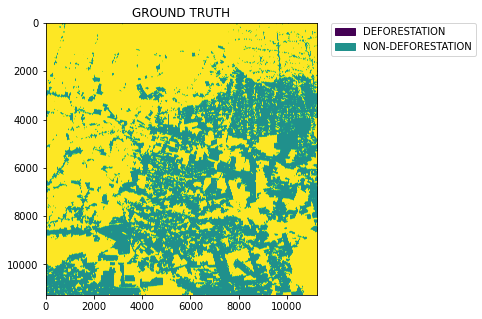

In [14]:
# IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 0 TO 9, RIGHT AN UNDERSCORE BEFORE IT E.G. "R_0" INSTEAD OF 0 OR "R_9" INSTEAD OF 9
# IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 10 TO 99, RIGHT AN UNDERSCORE BEFORE IT E.G. "_10" INSTEAD OF 10 OR "_90" INSTEAD OF 90
# IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 100 TO 143, RIGHT IT AS IT IS I.E. "100" FOR 1O0 OR "119" FOR "119"
image_number_full = "ter"
# visualize_data(image_tiles_full[image_number_full], "INPUT IMAGE")
visualize_labels(label_tiles_full[image_number_full])

# OPENING SENTINEL-1 16 GRID IMAGE TO TEST THE MODEL

In [15]:
# PUTTING ALL THE "IMAGES" AND "LABELS" INSIDE VARIABLES "image_path" AND "mask_path"
image_path_16_grid = "/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/CLOUDY_DATASET/SENTINEL1/2020/20201026/IMAGE_16_GRID/"
mask_path_16_grid = "/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/MASK_2020/MASK_16_GRID/"

# GETTING THE NAMES OF IMAGES AND MASKS
image_list_16_grid = os.listdir(image_path_16_grid)
mask_list_16_grid = os.listdir(mask_path_16_grid)

# SORTING THE NAMES OF IMAGES AND MASKS IN ASCENDING NUMBER ORDER 
image_list_16_grid.sort()
mask_list_16_grid.sort()

# CONCATENATING THE DIRECTORY WITH THE SPECIFIC IMAGE NAME AND EXTENSION
image_list_16_grid = [image_path_16_grid + i for i in image_list_16_grid]
mask_list_16_grid = [mask_path_16_grid + i for i in mask_list_16_grid]

In [16]:
# PRINTING DIRECTORY OF ALL THE "IMAGES" AND "LABELS"
print("SENTINEL-1 IMAGES:", image_list_16_grid)
print("LABELS:", mask_list_16_grid)

SENTINEL-1 IMAGES: ['/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/CLOUDY_DATASET/SENTINEL1/2020/20201026/IMAGE_16_GRID/RASTER_0.tif', '/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/CLOUDY_DATASET/SENTINEL1/2020/20201026/IMAGE_16_GRID/RASTER_1.tif', '/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/CLOUDY_DATASET/SENTINEL1/2020/20201026/IMAGE_16_GRID/RASTER_10.tif', '/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/CLOUDY_DATASET/SENTINEL1/2020/20201026/IMAGE_16_GRID/RASTER_11.tif', '/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/CLOUDY_DATASET/SENTINEL1/2020/20201026/IMAGE_16_GRID/RASTER_12.tif', '/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/CLOUDY_DATASET/SENTINEL1/2020/20201026/IMAGE_16_GRID/RASTER_13.tif', '/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_

In [17]:
# FETCH ALL THE ARRAY INFORMATION WITHIN THE VARIABLE "image_tiles" AND "label_tiles" FOR VISUALIZATION
image_tiles_16_grid = fetch_tiles(image_list_16_grid)
label_tiles_16_grid = fetch_tiles(mask_list_16_grid)

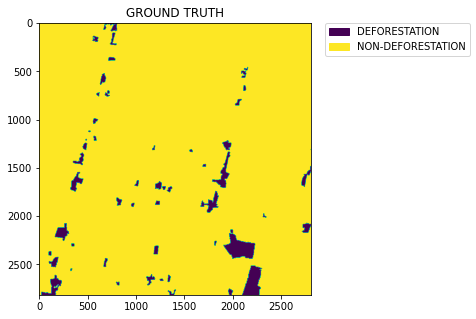

In [18]:
# IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 0 TO 9, RIGHT AN UNDERSCORE BEFORE IT E.G. "R_0" INSTEAD OF 0 OR "R_9" INSTEAD OF 9
# IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 10 TO 99, RIGHT AN UNDERSCORE BEFORE IT E.G. "_10" INSTEAD OF 10 OR "_90" INSTEAD OF 90
# IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 100 TO 143, RIGHT IT AS IT IS I.E. "100" FOR 1O0 OR "119" FOR "119"
image_number_16_grid = "R_0"
# visualize_data(image_tiles_16_grid[image_number_16_grid], "INPUT IMAGE")
visualize_labels(label_tiles_16_grid[image_number_16_grid])

# 2. SPLITTING THE TILES IN THE FORM OF PATCHES IN A GRID WISE MANNER 

# FULL IMAGE

In [19]:
# SETTING UP THE PATCH SIZE AND IDENTIFICATION OF THE NUMBER OF BANDS
patch_size = 256
# nbands = 1
nbands = image_tiles_full["ter"].shape[-1]
print("NUMBER OF BANDS ARE:", nbands)

NUMBER OF BANDS ARE: 2


In [20]:
# DEFINING A FUNCTION FOR CONVERTING IMAGES AND LABELS INTO PATCHES OF 256 x 256
def gridwise_sample(imgarray, patchsize):
    nrows, ncols, nbands = imgarray.shape
    patchsamples = np.zeros(shape = (0, patchsize, patchsize, nbands),
                            dtype = imgarray.dtype)
    for i in range(int(nrows/patchsize)):
        for j in range(int(ncols/patchsize)):
            tocat = imgarray[i * patchsize:(i + 1)*patchsize,
                             j * patchsize:(j + 1)*patchsize, :]
            tocat = np.nan_to_num(tocat, nan = np.nanmedian(tocat))
            tocat[tocat < -1] = np.median(tocat)
            tocat = np.expand_dims(tocat, axis = 0)
            patchsamples = np.concatenate((patchsamples, tocat),axis=0)
    return patchsamples

In [21]:
# SETTING UP FULL IMAGE FOR SENTINEL-1 AND SENTINEL-2 DATASET
Xtrain_full = np.zeros(shape = (0, patch_size, patch_size, nbands), dtype = np.float32)
Ytrain_full = np.zeros(shape = (0, patch_size, patch_size, 1), dtype = np.uint8)

# Sample of each Training Tile Systematically in a Gridwise Manner
train_areas_full = ["ter"]

for area in train_areas_full:
    X_toadd_full = gridwise_sample(image_tiles_full[area], patch_size)
    Y_toadd_full = gridwise_sample(label_tiles_full[area], patch_size)
    Xtrain_full = np.concatenate((Xtrain_full, X_toadd_full), axis = 0)
    Ytrain_full = np.concatenate((Ytrain_full, Y_toadd_full), axis = 0)

# Encode all Non-Deforestation Classes as Class "2"
Ytrain_full[Ytrain_full!=1] = 2
print("There are %i Training Patches in Sentinel-1 Raster of Size 256 x 256" % (Xtrain_full.shape[0]))

There are 1936 Training Patches in Sentinel-1 Raster of Size 256 x 256


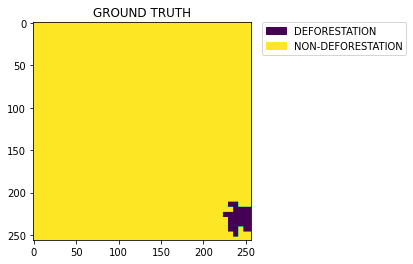

In [22]:
# VISUALIZING ONE RANDOM 256 x 256 PATCH I.E. IMAGE AGAINST ITS LABEL
patch_number = 451
# visualize_data(Xtrain_full[patch_number], "Training Patch " + str(patch_number), 4, 4)
visualize_labels(Ytrain_full[patch_number], 4, 4)

# IMAGE DIVIDED INTO 16 GRID

In [23]:
# SETTING UP THE PATCH SIZE AND IDENTIFICATION OF THE NUMBER OF BANDS
nband_16_grid = image_tiles_16_grid["R_0"].shape[-1]
print("NUMBER OF BANDS IN SENTINEL-1 RASTER:", nband_16_grid)

NUMBER OF BANDS IN SENTINEL-1 RASTER: 2


In [24]:
# SETTING UP FULL IMAGE FOR SENTINEL-1 AND SENTINEL-2 DATASET
Xtrain_16_grid = np.zeros(shape = (0, patch_size, patch_size, nband_16_grid), dtype = np.float32)
Ytrain_16_grid = np.zeros(shape = (0, patch_size, patch_size, 1), dtype = np.uint8)

# Sample of each Training Tile Systematically in a Gridwise Manner
train_areas_16_grid = ["R_0", "R_1", "R_2", "R_3" ,"R_4", "R_5", "R_6", "R_7", "R_8", "R_9", 
                       "_10", "_11", "_13", "_15" ,] # "_12" AND "_14" ARE KEPT FOR TEST SET 
                       
for area in train_areas_16_grid:
    X_toadd_16_grid = gridwise_sample(image_tiles_16_grid[area], patch_size)
    Y_toadd_16_grid = gridwise_sample(label_tiles_16_grid[area], patch_size)
    Xtrain_16_grid = np.concatenate((Xtrain_16_grid, X_toadd_16_grid), axis = 0)
    Ytrain_16_grid = np.concatenate((Ytrain_16_grid, Y_toadd_16_grid), axis = 0)

# Encode all Non-Deforestation Classes as Class "2"
Ytrain_16_grid[Ytrain_16_grid!=1] = 2
print("There are %i Training Patches in Sentinel-1 Raster of Size 256 x 256" % (Xtrain_16_grid.shape[0]))

There are 1694 Training Patches in Sentinel-1 Raster of Size 256 x 256


# 3. SETTING UP THE FULLY CONVOLUTIONAL NETWRK (FCN)

In [25]:
# IMPORTING THE ESSENTIAL LIBRARIES
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Activation, BatchNormalization, Reshape
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD, Adadelta
import tensorflow.python.keras.backend as K
sess = K.get_session()
from tensorflow.compat.v1.keras.backend import set_session

In [26]:
# DEFINING A FUNCTION FOR CONVERTING GROUND TRUTH TO ONE-HOT ENCODING
def to_categorical_4d(y, nc):
    Y = np.zeros((y.shape[0],
                  y.shape[1],
                  y.shape[2],
                  nc),
                  dtype=np.int32)
    for h in range(y.shape[0]):
        for i in range(y.shape[1]):
            for j in range(y.shape[2]):
                if y[h, i, j, 0]!= 0:
                    Y[h, i, j, y[h, i, j, 0]-1] = 1
                else:
                    continue
    return Y

In [27]:
# TRANSFORM TARGET ARRAYS TO ONE-HOT ENCODINGS
Ytrain_16_grid = to_categorical_4d(Ytrain_16_grid, 2)

In [28]:
# IMPORTING THE ESSENTIAL LIBRARIES FOR SEGNET
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras import backend as K

In [29]:
# DEFINING A FUNCTION FOR CALCULATING JACARD COEFFICIENT
def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

# DEFINING A FUNCTION TO PREPARE SEGNET ARCHITECTURE MODEL

In [30]:
# IMPORT THE LIBRARIES ESSENTIAL FOR SEGNET
from keras.layers import Activation, Dense, BatchNormalization, Dropout, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Input, Reshape

In [31]:
# SEGNET ARCHITECTURE
def segnet_model(optimizer, nrows, ncols, nbands, nclasses):

    # ENCODER

    # ENCODER NUMBER 1
    img_input = Input(shape = (nrows, ncols, nbands))
    x = Conv2D(64, (3, 3), padding = 'same', name = 'conv1',strides = (1,1))(img_input)
    x = BatchNormalization(name = 'bn1')(x)
    x = Activation('relu')(x)
    x = Conv2D(64, (3, 3), padding = 'same', name = 'conv2')(x)
    x = BatchNormalization(name = 'bn2')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)
    
    # ENCODER NUMBER 2
    x = Conv2D(128, (3, 3), padding = 'same', name = 'conv3')(x)
    x = BatchNormalization(name = 'bn3')(x)
    x = Activation('relu')(x)
    x = Conv2D(128, (3, 3), padding = 'same', name = 'conv4')(x)
    x = BatchNormalization(name = 'bn4')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    # ENCODER NUMBER 3
    x = Conv2D(256, (3, 3), padding = 'same', name = 'conv5')(x)
    x = BatchNormalization(name = 'bn5')(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding = 'same', name = 'conv6')(x)
    x = BatchNormalization(name = 'bn6')(x)
    x = Activation('relu')(x)
    x = Conv2D(256, (3, 3), padding = 'same', name = 'conv7')(x)
    x = BatchNormalization(name = 'bn7')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    # ENCODER NUMBER 4
    x = Conv2D(512, (3, 3), padding = 'same', name = 'conv8')(x)
    x = BatchNormalization(name = 'bn8')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding = 'same', name = 'conv9')(x)
    x = BatchNormalization(name = 'bn9')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding = 'same', name = 'conv10')(x)
    x = BatchNormalization(name = 'bn10')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)
    
    # ENCODER NUMBER 5
    x = Conv2D(512, (3, 3), padding = 'same', name = 'conv11')(x)
    x = BatchNormalization(name = 'bn11')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding = 'same', name = 'conv12')(x)
    x = BatchNormalization(name = 'bn12')(x)
    x = Activation('relu')(x)
    x = Conv2D(512, (3, 3), padding = 'same', name = 'conv13')(x)
    x = BatchNormalization(name='bn13')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)

    x = Dense(1024, activation = 'relu', name = 'fc1')(x)
    x = Dense(1024, activation = 'relu', name = 'fc2')(x)
    
    # DECODER 

    # DECODER NUMBER 5
    x = UpSampling2D()(x)
    x = Conv2DTranspose(512, (3, 3), padding = 'same', name = 'deconv1')(x)
    x = BatchNormalization(name = 'bn14')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding = 'same', name = 'deconv2')(x)
    x = BatchNormalization(name = 'bn15')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding = 'same', name = 'deconv3')(x)
    x = BatchNormalization(name = 'bn16')(x)
    x = Activation('relu')(x)
    
    # DECODER NUMBER 4
    x = UpSampling2D()(x)
    x = Conv2DTranspose(512, (3, 3), padding = 'same', name = 'deconv4')(x)
    x = BatchNormalization(name = 'bn17')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(512, (3, 3), padding = 'same', name = 'deconv5')(x)
    x = BatchNormalization(name = 'bn18')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(256, (3, 3), padding = 'same', name = 'deconv6')(x)
    x = BatchNormalization(name = 'bn19')(x)
    x = Activation('relu')(x)

    # DECODER NUMBER 3
    x = UpSampling2D()(x)
    x = Conv2DTranspose(256, (3, 3), padding = 'same', name = 'deconv7')(x)
    x = BatchNormalization(name = 'bn20')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(256, (3, 3), padding = 'same', name = 'deconv8')(x)
    x = BatchNormalization(name = 'bn21')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(128, (3, 3), padding = 'same', name = 'deconv9')(x)
    x = BatchNormalization(name = 'bn22')(x)
    x = Activation('relu')(x)

    # DECODER NUMBER 2
    x = UpSampling2D()(x)
    x = Conv2DTranspose(128, (3, 3), padding = 'same', name = 'deconv10')(x)
    x = BatchNormalization(name = 'bn23')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(64, (3, 3), padding = 'same', name = 'deconv11')(x)
    x = BatchNormalization(name = 'bn24')(x)
    x = Activation('relu')(x)
    
    # DECODER NUMBER 1
    x = UpSampling2D()(x)
    x = Conv2DTranspose(64, (3, 3), padding = 'same', name = 'deconv12')(x)
    x = BatchNormalization(name = 'bn25')(x)
    x = Activation('relu')(x)
    x = Conv2DTranspose(1, (3, 3), padding = 'same', name = 'deconv13')(x)
    x = BatchNormalization(name = 'bn26')(x)
    x = Activation('relu')(x)
    
    # x = Activation('sigmoid')(x)
    # pred = Reshape((nrows, ncols))(x)
    
    outputs = Conv2D(nclasses, (1, 1), activation = 'softmax')(x)

    # model = Model(inputs = img_input, outputs = pred)
    model = Model(inputs = img_input, outputs = outputs)
    
    #NOTE: COMPILE THE MODEL IN THE MAIN PROGRAM TO MAKE IT ASY TO TEST WITH VARIOUS LOSS FUNCTION
    model.compile(loss = "categorical_crossentropy", metrics = ['accuracy'], optimizer = optimizer)

    return model

# DIVIDING THE DATASET INTO TRAINING, VALIDATION AND TEST SET

In [32]:
# DIVIDING THE SENTINEL-1 DATASET INTO TRAINING AND VALIDATION SET
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(Xtrain_16_grid, Ytrain_16_grid, test_size = 0.15, random_state = 1)

print("TRAINING AND VALIDATION SET OF SENTINEL-1 RASTER:")
print("X-TRAIN:", x_train.shape[0], "PATCHES")
print("Y-TRAIN:", y_train.shape[0], "PATCHES")
print("\nX-VALIDATION:", x_val.shape[0], "PATCHES")
print("Y-VALIDATION:", y_val.shape[0], "PATCHES")

TRAINING AND VALIDATION SET OF SENTINEL-1 RASTER:
X-TRAIN: 1439 PATCHES
Y-TRAIN: 1439 PATCHES

X-VALIDATION: 255 PATCHES
Y-VALIDATION: 255 PATCHES


In [33]:
# DEFINING A FUNCTION FOR TRAINING THE MODEL USING "MODEL CHECKPOINT", "EARLY STOPPING" AND "CSV LOGGER"
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import CSVLogger
import imp, h5py
imp.reload(h5py)

model_fname = "/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/CLOUDY_DATASET/CLOUD_TRAINED_MODEL/2020/SENTINEL1/SEGNET_Weights_Improvement_{epoch:02d}_{val_acc:.2f}.hdf5"
csv_logger_save = "/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/CLOUDY_DATASET/CLOUD_TRAINED_MODEL/2020/SENTINEL1/SEGNET_256_LOGS.csv"

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 30)
checkpoint = ModelCheckpoint(model_fname, monitor = "val_acc", verbose = 1, save_best_only = True, mode = "max")
csv_logger = CSVLogger(csv_logger_save, separator = ",", append = False)
callbacks_list = [early_stop, checkpoint, csv_logger]

def train(model, data, labels):
    hist = model.fit(x = data,
                     y = labels,
                     epochs = number_epochs, 
                     verbose = 2, 
                     validation_data = (x_val, y_val),
                     callbacks = callbacks_list)
    return hist

In [34]:
# DEFINING A FUNCTION FOR "recall_m"
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [35]:
# DEFINING A FUNCTION FOR "precision_m"
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [36]:
# DEFININF A FUNCTION FOR "f1_m"
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [37]:
# SETTING UP THE BASIC PARAMETERS OF THE FULLY CONVOLUTIONAL NETWORK (FCN)
number_bands = 2
number_classes = 2
number_epochs = 250  

In [38]:
# DEFINING THE FULLY CONVOLUTIONAL NETWORK (FCN) MODEL SPECIFICALLY THE U-NET
opt = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9)
fcn_sar = segnet_model(opt, patch_size, patch_size, number_bands, number_classes)
fcn_sar.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['acc', f1_m,precision_m, recall_m]) #'adam'

# TIME TO RUN THE MODEL

In [ ]:
# TIME TO TRAIN AND SAVE THE FCN MODEL
history = train(fcn_sar, x_train, y_train)
fcn_sar.save(model_fname)

Epoch 1/250


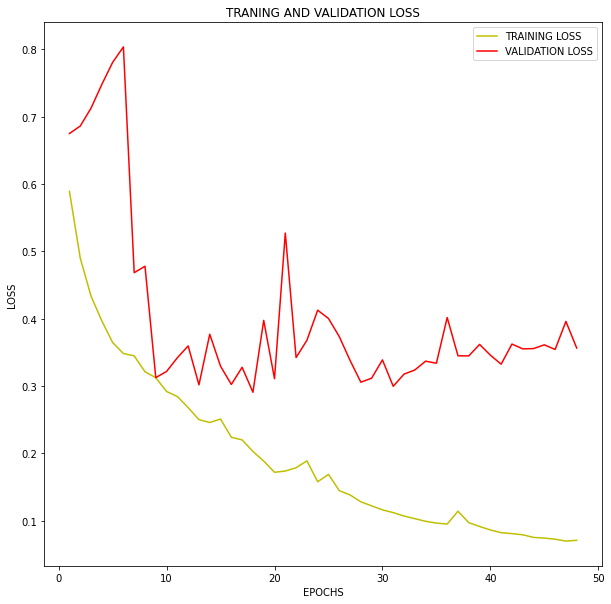

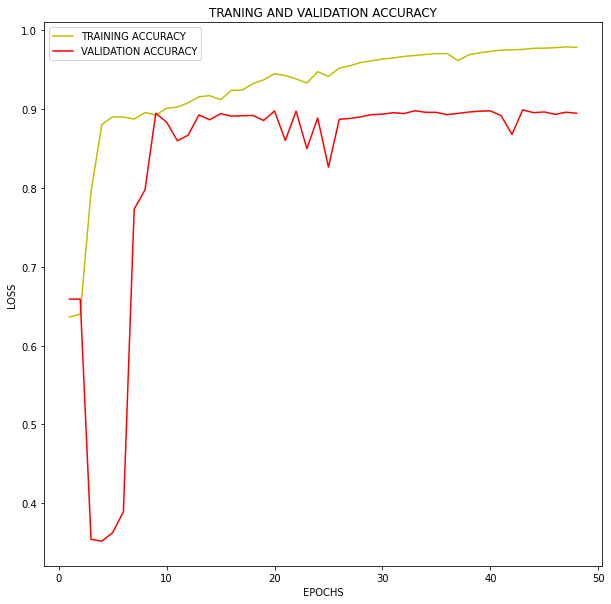

In [ ]:
# PLOTTING THE TRAINING AND VALIDATION LOSS OF THE MODEL
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'TRAINING LOSS')
plt.plot(epochs, val_loss, 'r', label = 'VALIDATION LOSS')
plt.title('TRANING AND VALIDATION LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.show()

# PLOTTING THE TRAINING AND VALIDATION ACCURACY OF THE MODEL
accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
epochs_2 = range(1, len(accuracy) + 1)
plt.plot(epochs_2, accuracy, 'y', label = 'TRAINING ACCURACY')
plt.plot(epochs_2, validation_accuracy, 'r', label = 'VALIDATION ACCURACY')
plt.title('TRANING AND VALIDATION ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.show()

# PREDICTION ON TRAINING, VALIDATION AND TEST SET USING THE TRAINED WEIGHTS

In [ ]:
fcn_sar.load_weights("/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/CLOUDY_DATASET/CLOUD_TRAINED_MODEL/2020/SENTINEL1/SEGNET_Weights_Improvement_33_0.90.hdf5")

In [ ]:
# EVALUATING THE MODEL PERFORMANCE ON TRAINING SET
res = fcn_sar.evaluate(x_train, y_train)
print('________________________')
print('OVERALL ACCURACY:       |   {:.2f}  |'.format(res[1]*100))
print('F1 SCORE:               |   {:.2f}  |'.format(res[2]*100))
print('PRECISION:              |   {:.2f}  |'.format(res[3]*100))
print('RECALL:                 |   {:.2f}  |'.format(res[4]*100))
print('________________________')

45/45 [==============================] - 24s 236ms/step - loss: 0.0998 - acc: 0.9692 - f1_m: 0.9692 - precision_m: 0.9692 - recall_m: 0.9692
________________________
OVERALL ACCURACY:       |   96.92  |
F1 SCORE:               |   96.92  |
PRECISION:              |   96.92  |
RECALL:                 |   96.92  |
________________________


In [ ]:
# EVALUATING THE MODEL PERFORMANCE ON VALIDATION SET
res_2 = fcn_sar.evaluate(x_val, y_val)
print('________________________')
print('OVERALL ACCURACY:       |   {:.2f}  |'.format(res_2[1]*100))
print('F1 SCORE:               |   {:.2f}  |'.format(res_2[2]*100))
print('PRECISION:              |   {:.2f}  |'.format(res_2[3]*100))
print('RECALL:                 |   {:.2f}  |'.format(res_2[4]*100))
print('________________________')

8/8 [==============================] - 2s 205ms/step - loss: 0.3236 - acc: 0.8978 - f1_m: 0.8978 - precision_m: 0.8978 - recall_m: 0.8978
________________________
OVERALL ACCURACY:       |   89.78  |
F1 SCORE:               |   89.78  |
PRECISION:              |   89.78  |
RECALL:                 |   89.78  |
________________________


In [ ]:
# # EVALUATING THE MODEL PERFORMANCE ON TEST SET 
# res_3 = fcn_sar.evaluate([x_test_S2, x_test_S1], y_test_GT)
# print('________________________')
# print('OVERALL ACCURACY:       |   {:.2f}  |'.format(res_3[1]*100))
# print('F1 SCORE:               |   {:.2f}  |'.format(res_3[2]*100))
# print('PRECISION:              |   {:.2f}  |'.format(res_3[3]*100))
# print('RECALL:                 |   {:.2f}  |'.format(res_3[4]*100))
# print('________________________')

In [39]:
# DEFINING A FUNCTION TO PERFORM PREDICTION ON TEST SET
def evaluate_predictions(Xtest, w8fname, cut, overlap, Ytest, model_builder):
    Ytest = Ytest.copy()
    Ytest[Ytest!=2] = 0
    Ytest[Ytest==2] = 1
    ncols, nrows, nbands = Xtest.shape
    Xtest = np.expand_dims(Xtest, axis=0)
    total_map = np.zeros((nrows, ncols), dtype=np.uint8)
    first = True
    last = False
    if nrows%cut==0:
        numstrips = int(nrows/cut)
    else:
        numstrips = int(nrows/cut) + 1
    for i in range(numstrips):
        print("Strip number: %d" % i)
        if first:
            striptop = 0
            stripbottom = overlap
            height = cut
            X_sub = Xtest[:, cut*i-striptop:(cut*i)+height+stripbottom, :, :]
            first = False
        elif (not first) and (cut*(i+1)+1+overlap < nrows):
            striptop = overlap
            stripbottom = overlap
            height = cut
            X_sub = Xtest[:, cut*i-striptop:(cut*i)+height+stripbottom, :, :]
        else:
            print("Last hit!")
            striptop = overlap
            stripbottom = 0
            height = nrows - cut*i
            if (striptop+height)%(4)!=0:
                height = height*4
            X_sub = Xtest[:, -(striptop+height):, :, :]
            last = True        
        sub_nrows = X_sub.shape[1]
        sub_ncols = X_sub.shape[2]
        model = model_builder(opt, sub_nrows, sub_ncols, nbands, number_classes)
        model.load_weights(w8fname)
        sub_ns, sub_nb, _, __ = X_sub.shape
        cmap = model.predict_on_batch([X_sub])
        cmap = np.argmax(cmap[0], axis=2)
        if not last:
            total_map[cut*i:cut*i+height, :] = cmap[striptop:striptop+height, 0:total_map.shape[1]]
        else:
            total_map[-(height):, :] = cmap[-(height):, 0:total_map.shape[1]]
    return total_map

In [40]:
# IMAGES TILES FROM FULL RASTER
x_test_2 = image_tiles_full["ter"]
y_test_2 = label_tiles_full["ter"]

# TRANSFORMATIONS AND PROJECTIONS OF THE INPUT RASTER

In [41]:
# PUTTING THE TRANSFORMATION AND PROJECTION OF THE INPUT RASTER WITHIN VARIABLE FOR SENTINEL-1
ds = gdal.Open("/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/CLOUDY_DATASET/SENTINEL1/2020/20201026/IMAGE_FULL/raster.tif")
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

In [42]:
import string
from matplotlib import colors
from sklearn.metrics import f1_score, precision_score, recall_score

# set color codes of the classes
deforestation = [253, 231, 36]
non_deforestation = [32, 144, 140]
ccolors = (deforestation, non_deforestation)
NROWS, NCOLS, NBANDS = x_test_2.shape

"""
    Print the classified map.
    Keyword arguments:
    predictions -- the array output labels from the classification
    results
    idxarray -- the array of indices of the classified samples
    to be plotted.
    filename -- the name (with the directory) of the file where to
    write the map.
    ccolors -- an array of tuples containing rgb values for the classes
    Both arrays should match and be arranged accordingly. And the
    index of the color should match the value of the of prediction.
"""

def print_map(predictions, idxarray, filename = None, title = None, ccolors = None):
    if predictions.size != idxarray.shape[0]:
        raise ValueError("There should be the same number of " +
                         "predictions and indices.")
    nrows, ncols = np.max(idxarray[:, 0])+1, np.max(idxarray[:, 1])+1
    classifiedmap = np.zeros((nrows, ncols, 3), dtype="uint8")
    idx = 0
    for prediction in predictions:
        classifiedmap[idxarray[idx, 0],
                      idxarray[idx, 1]] = np.asarray(ccolors[prediction])
        idx += 1
    if filename is None:
        fig = plt.figure()
        plt.imshow(classifiedmap)
        if title:
            plt.suptitle(title)
        plt.show()
    else:
        output_raster = gdal.GetDriverByName('GTiff').Create(filename, NCOLS, NROWS, number_classes, gdal.GDT_Byte)
        output_raster.SetGeoTransform(gt)
        output_raster.SetProjection(proj)
        
        for i in range(number_classes):
            output_raster.GetRasterBand(i+1).WriteArray(classifiedmap.astype(np.uint8)[:, :, i])

In [43]:
"""Compute the Confusion Matrix

    Keyword arguments:
    prediction -- the array output labels from the classification
    results
    labels -- the  array of "true" labels from the test set
    Both arrays should match, be arranged accordingly, and
    have non-negative values.
"""

def get_confusion_matrix(predictions, labels):
    classes = np.unique(labels)
    nbclasses = classes.size
    if labels.size != predictions.size:
        raise ValueError("There should be the same number of " +
                         "predictions and labels.")
    merged = np.concatenate((predictions.reshape(predictions.size, 1),
                             labels.reshape(labels.size, 1)), axis=1)
    CM = np.zeros((classes[-1] + 1, classes[-1] + 1))
    for c1 in classes:
        for c2 in classes:
            CM[c1, c2] = np.sum(np.logical_and(merged[:, 1] == c1,
                                               merged[:, 0] == c2))
    return CM

In [44]:
"""Utility function to create cartesian image coordinates."""

def cartesian(arrays, out=None):
    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype
    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)
    m = int(n / arrays[0].size)
    out[:, 0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m, 1:])
        for j in range(1, arrays[0].size):
            out[j*m:(j+1)*m, 1:] = out[0:m, 1:]
    return out

In [45]:
cut = 256
overlap = 0
weights_pretrained_FCN = "/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/CLOUDY_DATASET/CLOUD_TRAINED_MODEL/2020/SENTINEL1/SEGNET_Weights_Improvement_33_0.90.hdf5"
predictions_FCN = evaluate_predictions(x_test_2, weights_pretrained_FCN, cut, overlap, y_test_2, segnet_model)

Strip number: 0
Strip number: 1
Strip number: 2
Strip number: 3
Strip number: 4
Strip number: 5
Strip number: 6
Strip number: 7
Strip number: 8
Strip number: 9
Strip number: 10
Strip number: 11
Strip number: 12
Strip number: 13
Strip number: 14
Strip number: 15
Strip number: 16
Strip number: 17
Strip number: 18
Strip number: 19
Strip number: 20
Strip number: 21
Strip number: 22
Strip number: 23
Strip number: 24
Strip number: 25
Strip number: 26
Strip number: 27
Strip number: 28
Strip number: 29
Strip number: 30
Strip number: 31
Strip number: 32
Strip number: 33
Strip number: 34
Strip number: 35
Strip number: 36
Strip number: 37
Strip number: 38
Strip number: 39
Strip number: 40
Strip number: 41
Strip number: 42
Strip number: 43
Last hit!


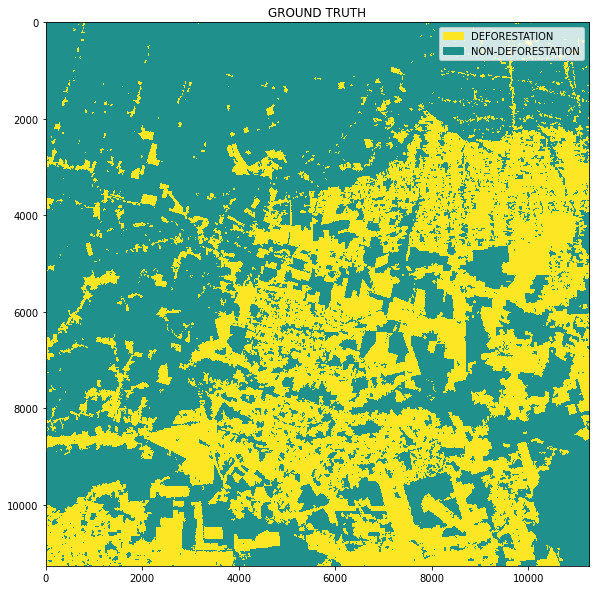

In [46]:
# PLOT REFERENCE MAP
norm_ccolors = np.array(ccolors)/255.0
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
cmap = colors.ListedColormap(norm_ccolors)
bounds = [0, 1, 2]
norm = colors.BoundaryNorm(bounds, cmap.N)
labels = y_test_2[:, :, 0].copy()
labels[labels!=2] = 0
labels[labels==2] = 1
ax.imshow(labels, cmap = cmap, norm=norm, interpolation = "nearest", origin = "upper")
ax.set_title("GROUND TRUTH")
rectangles = [matplotlib.patches.Rectangle((0, 0), 1, 1, color=norm_ccolors[r]) for r in range(norm_ccolors.shape[0])]
classes = ["DEFORESTATION", "NON-DEFORESTATION"]
#Create legend from custom artist/label lists
ax.legend(rectangles, classes)
plt.show()
labels = labels.astype("uint8")

ACCURACY METRICS OF SEGNET RESULTS:

Overall Accuracy: 0.937297
F1 SCORE: 0.945411
PA of Deforestation: 0.919552
PA of Non-Deforestation: 0.948555
User Accuracy of Deforestation: 0.919552
User Accuracy of Non-Deforestation: 0.948555
Producer Accuracy of Deforestation: 0.918965
Producer Accuracy of Non-Deforestation: 0.948939


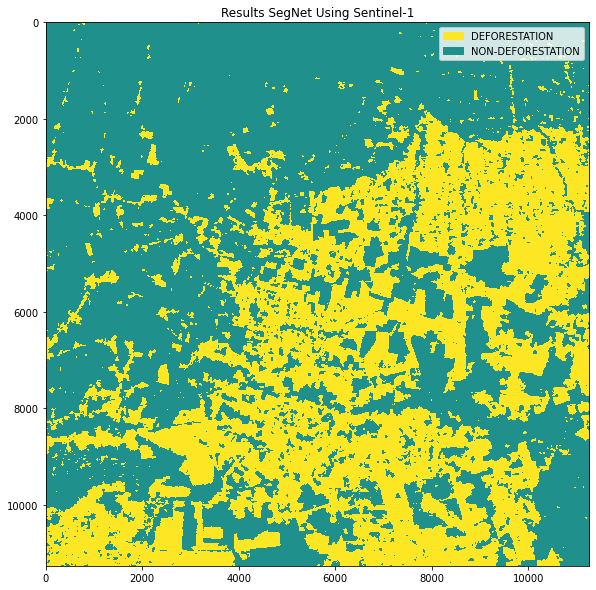

In [47]:
# EVALUATE SEGNET
predictions = predictions_FCN
mapidx = cartesian([range(predictions.shape[0]), range(predictions.shape[1])])
CM = get_confusion_matrix(predictions, labels)
OA = np.sum(np.diag(CM))/predictions.size
PA_bldg = ((predictions[labels==0]==labels[labels==0]).sum())/(labels[labels==0].size)
PA_rd = ((predictions[labels==1]==labels[labels==1]).sum())/(labels[labels==1].size)

# CALCULATION OF USER ACCURACY FOR DEFORESTATION
a = CM[0][0]
b = CM[0][1]
ua_deforestation = a/(a+b)
c = CM[1][0]
d = CM[1][1]
ua_non_deforest = d/(c+d)

# CALCULATION OF PRODUCER ACCURACY FOR DEFORESTATION
e = CM[0][0]
f = CM[1][0]
pa_deforestation = e/(e+f)
g = CM[0][1]
h = CM[1][1]
pa_non_deforest = h/(g+h)

print("ACCURACY METRICS OF SEGNET RESULTS:\n")
print("Overall Accuracy: %f" % OA)
print("F1 SCORE: %f" %(f1_score(labels, predictions, average="macro")))
print("PA of Deforestation: %f" % PA_bldg)
print("PA of Non-Deforestation: %f" % PA_rd)

print("User Accuracy of Deforestation: %f" % ua_deforestation)
print("User Accuracy of Non-Deforestation: %f" % ua_non_deforest)
print("Producer Accuracy of Deforestation: %f" % pa_deforestation)
print("Producer Accuracy of Non-Deforestation: %f" % pa_non_deforest)

mapfname = "/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/OUTPUT_TIFF/CLOUDY/2020/SENTINEL1_FULL_IMAGE.tif"

predictions_ = predictions.flatten()
print_map(predictions_, mapidx, ccolors=ccolors, filename=mapfname)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(predictions, cmap=cmap, norm=norm, interpolation="nearest", origin="upper")
ax.set_title("Results SegNet Using Sentinel-1")

# Code for Printing the Labels
rectangles = [matplotlib.patches.Rectangle((0, 0), 1, 1, color = norm_ccolors[r]) for r in range(norm_ccolors.shape[0])]
classes = ["DEFORESTATION", "NON-DEFORESTATION"]
ax.legend(rectangles, classes)

plt.show()

In [48]:
# PUTTING ALL THE TRUE AND FALSE VALUES INSIDE A "CSV" FILE
import pandas as pd
predictions_2 = predictions.ravel()
labels_2 = labels.ravel()
sentinel2_full = (predictions_2 == labels_2)
sentinel2_full_2 = pd.Series(sentinel2_full)
sentinel2_full_3 = pd.DataFrame(sentinel2_full_2)
sentinel2_full_4 = sentinel2_full_3.rename(columns = {0:'SENTINEL1'})
sentinel2_full_4

,SENTINEL1
0,True
1,True
2,True
3,True
4,True
...,...
126877691,True
126877692,True
126877693,True
126877694,True


In [49]:
sentinel2_full_4.to_csv("/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/MCNEMAR_TEST/CLOUDY/SENTINEL1/FULL_IMAGE.csv")

In [50]:
# IMPORT THE ESSENTIAL LIBRARIES FOR PLOTTING TE CONFUSION MATRIX
import seaborn as sns
import matplotlib.pyplot as plt

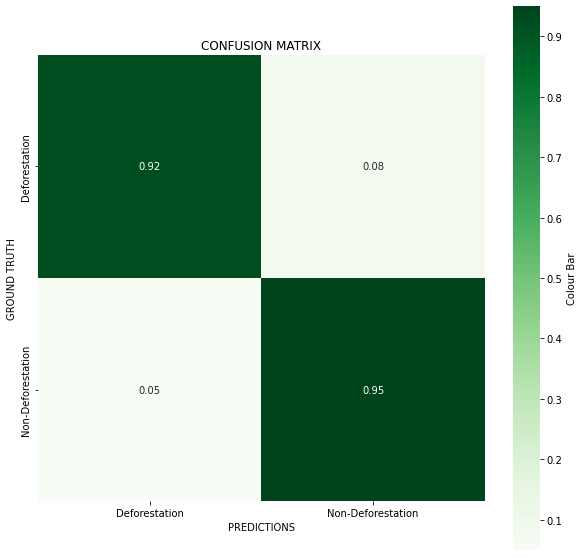

In [51]:
# print("NORMALIZED CONFUSION MATRIX:")
cm_normalized = np.round(CM/np.sum(CM, axis = 1).reshape(-1, 1), 2)
# print(cm_normalized)
sns.heatmap(cm_normalized, cmap = "Greens", annot = True, 
            cbar_kws = {"orientation":"vertical", "label":"Colour Bar"},
            xticklabels = ["Deforestation", "Non-Deforestation"], yticklabels = ["Deforestation", "Non-Deforestation"], square = True)
sns.set(rc = {'figure.figsize':(8, 8)})
plt.xlabel("PREDICTIONS")
plt.ylabel("GROUND TRUTH")
plt.title("CONFUSION MATRIX")
plt.show()

# TEST SET 1

In [52]:
# IMAGES TILES FROM FULL RASTER
x_test_3 = image_tiles_16_grid["_12"]
y_test_3 = label_tiles_16_grid["_12"]

In [53]:
# PUTTING THE TRANSFORMATION AND PROJECTION OF THE INPUT RASTER WITHIN VARIABLE FOR SENTINEL-1
ds_2 = gdal.Open("/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/CLOUDY_DATASET/SENTINEL1/2020/20201026/IMAGE_16_GRID/RASTER_12.tif")
gt_2 = ds_2.GetGeoTransform()
proj_2 = ds_2.GetProjection()

In [54]:
import string
from matplotlib import colors
from sklearn.metrics import f1_score, precision_score, recall_score

# SET COLOUR CODES OF THE CLASSES
deforestation = [253, 231, 36]
non_deforestation = [32, 144, 140]
ccolors = (deforestation, non_deforestation)
NROWS, NCOLS, NBANDS2 = x_test_3.shape

"""
    Print the classified map.
    Keyword arguments:
    predictions -- the array output labels from the classification
    results
    idxarray -- the array of indices of the classified samples
    to be plotted.
    filename -- the name (with the directory) of the file where to
    write the map.
    ccolors -- an array of tuples containing rgb values for the classes
    Both arrays should match and be arranged accordingly. And the
    index of the color should match the value of the of prediction.
"""

def print_map_2(predictions, idxarray, filename = None, title = None, ccolors = None):
    if predictions.size != idxarray.shape[0]:
        raise ValueError("There should be the same number of " +
                         "predictions and indices.")
    nrows, ncols = np.max(idxarray[:, 0])+1, np.max(idxarray[:, 1])+1
    classifiedmap = np.zeros((nrows, ncols, 3), dtype="uint8")
    idx = 0
    for prediction in predictions:
        classifiedmap[idxarray[idx, 0],
                      idxarray[idx, 1]] = np.asarray(ccolors[prediction])
        idx += 1
    if filename is None:
        fig = plt.figure()
        plt.imshow(classifiedmap)
        if title:
            plt.suptitle(title)
        plt.show()
    else:
        output_raster = gdal.GetDriverByName('GTiff').Create(filename, NCOLS, NROWS, number_classes, gdal.GDT_Byte)
        output_raster.SetGeoTransform(gt_2)
        output_raster.SetProjection(proj_2)

        for i in range(number_classes):
            output_raster.GetRasterBand(i+1).WriteArray(classifiedmap.astype(np.uint8)[:, :, i])

In [55]:
predictions_FCN = evaluate_predictions(x_test_3, weights_pretrained_FCN, cut, overlap, y_test_3, segnet_model)

Strip number: 0
Strip number: 1
Strip number: 2
Strip number: 3
Strip number: 4
Strip number: 5
Strip number: 6
Strip number: 7
Strip number: 8
Strip number: 9
Strip number: 10
Last hit!


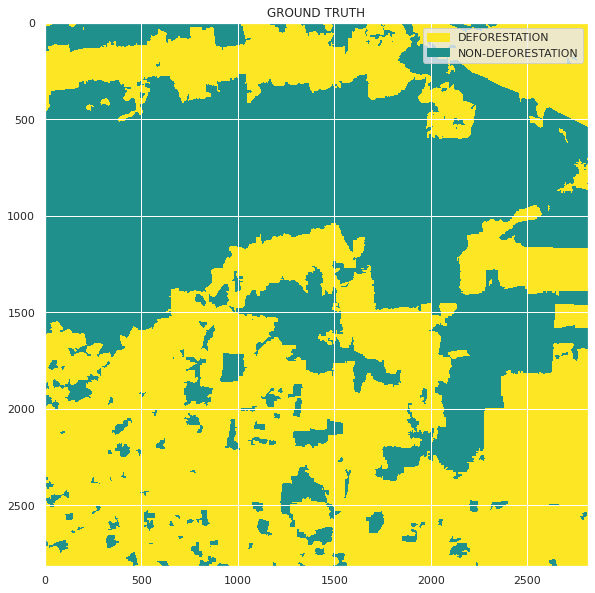

In [56]:
# PLOT REFERENCE MAP
norm_ccolors = np.array(ccolors)/255.0
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
cmap = colors.ListedColormap(norm_ccolors)
bounds = [0,1,2]
norm = colors.BoundaryNorm(bounds, cmap.N)
labels = y_test_3[:, :, 0].copy()
labels[labels!=2] = 0
labels[labels==2] = 1
ax.imshow(labels, cmap = cmap, norm=norm, interpolation = "nearest", origin = "upper")
ax.set_title("GROUND TRUTH")
rectangles = [matplotlib.patches.Rectangle((0, 0), 1, 1, color=norm_ccolors[r]) for r in range(norm_ccolors.shape[0])]
classes = ["DEFORESTATION", "NON-DEFORESTATION"]
#Create legend from custom artist/label lists
ax.legend(rectangles, classes)
plt.show()
labels = labels.astype("uint8")

ACCURACY METRICS OF SEGNET RESULTS:

Overall Accuracy: 0.890795
F1 SCORE: 0.882805
PA of Deforestation: 0.912854
PA of Non-Deforestation: 0.865811
User Accuracy of Deforestation: 0.912854
User Accuracy of Non-Deforestation: 0.865811
Producer Accuracy of Deforestation: 0.885123
Producer Accuracy of Non-Deforestation: 0.897665


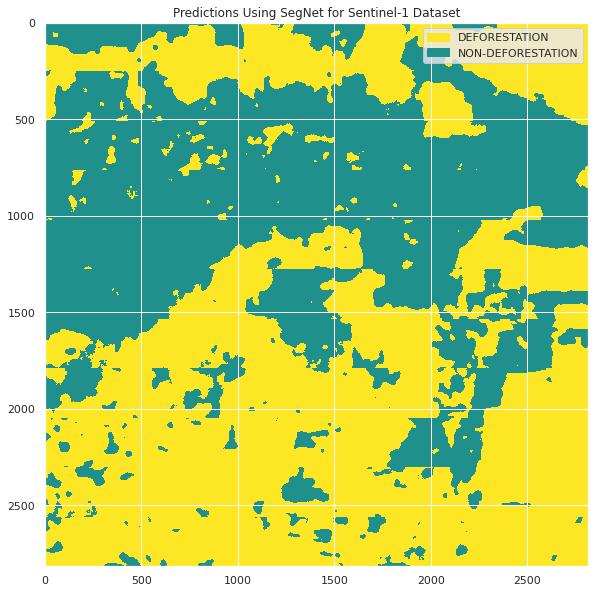

In [57]:
# EVALUATE SEGNET BASED LATE FUSION
predictions = predictions_FCN
mapidx = cartesian([range(predictions.shape[0]), range(predictions.shape[1])])
CM = get_confusion_matrix(predictions, labels)
OA = np.sum(np.diag(CM))/predictions.size
PA_bldg = ((predictions[labels==0]==labels[labels==0]).sum())/(labels[labels==0].size)
PA_rd = ((predictions[labels==1]==labels[labels==1]).sum())/(labels[labels==1].size)

# CALCULATION OF USER ACCURACY FOR DEFORESTATION
a = CM[0][0]
b = CM[0][1]
ua_deforestation = a/(a+b)
c = CM[1][0]
d = CM[1][1]
ua_non_deforest = d/(c+d)

# CALCULATION OF PRODUCER ACCURACY FOR DEFORESTATION
e = CM[0][0]
f = CM[1][0]
pa_deforestation = e/(e+f)
g = CM[0][1]
h = CM[1][1]
pa_non_deforest = h/(g+h)

print("ACCURACY METRICS OF SEGNET RESULTS:\n")
print("Overall Accuracy: %f" % OA)
print("F1 SCORE: %f" %(f1_score(labels, predictions, average="macro")))
print("PA of Deforestation: %f" % PA_bldg)
print("PA of Non-Deforestation: %f" % PA_rd)

print("User Accuracy of Deforestation: %f" % ua_deforestation)
print("User Accuracy of Non-Deforestation: %f" % ua_non_deforest)
print("Producer Accuracy of Deforestation: %f" % pa_deforestation)
print("Producer Accuracy of Non-Deforestation: %f" % pa_non_deforest)

mapfname = "/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/OUTPUT_TIFF/CLOUDY/2020/SENTINEL1_TEST_1.tif"

predictions_ = predictions.flatten()
print_map_2(predictions_, mapidx, ccolors = ccolors, filename = mapfname)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(predictions, cmap = cmap, norm = norm, interpolation = "nearest", origin = "upper")
ax.set_title("Predictions Using SegNet for Sentinel-1 Dataset")

# Code for Printing the Labels
rectangles = [matplotlib.patches.Rectangle((0, 0), 1, 1, color = norm_ccolors[r]) for r in range(norm_ccolors.shape[0])]
classes = ["DEFORESTATION", "NON-DEFORESTATION"]
ax.legend(rectangles, classes)

plt.show()

In [58]:
# PUTTING ALL THE TRUE AND FALSE VALUES INSIDE A "CSV" FILE
import pandas as pd
predictions_2 = predictions.ravel()
labels_2 = labels.ravel()
sentinel2_full = (predictions_2 == labels_2)
sentinel2_full_2 = pd.Series(sentinel2_full)
sentinel2_full_3 = pd.DataFrame(sentinel2_full_2)
sentinel2_full_4 = sentinel2_full_3.rename(columns = {0:'SENTINEL1'})
sentinel2_full_4

,SENTINEL1
0,False
1,False
2,False
3,False
4,False
...,...
7929851,True
7929852,True
7929853,True
7929854,True


In [59]:
sentinel2_full_4.to_csv("/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/MCNEMAR_TEST/CLOUDY/SENTINEL1/TEST1.csv")

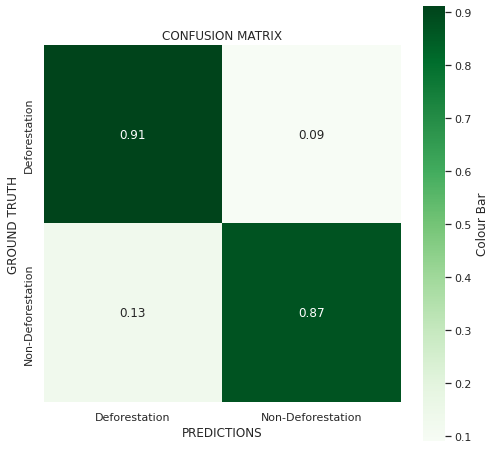

In [60]:
# print("NORMALIZED CONFUSION MATRIX:")
cm_normalized = np.round(CM/np.sum(CM, axis = 1).reshape(-1, 1), 2)
# print(cm_normalized)
sns.heatmap(cm_normalized, cmap = "Greens", annot = True, 
            cbar_kws = {"orientation":"vertical", "label":"Colour Bar"},
            xticklabels = ["Deforestation", "Non-Deforestation"], yticklabels = ["Deforestation", "Non-Deforestation"], square = True)
sns.set(rc = {'figure.figsize':(8, 8)})
plt.xlabel("PREDICTIONS")
plt.ylabel("GROUND TRUTH")
plt.title("CONFUSION MATRIX")
plt.show()

# TEST SET 2

In [61]:
# IMAGES TILES FROM FULL RASTER
x_test_4 = image_tiles_16_grid["_14"]
y_test_4 = label_tiles_16_grid["_14"]

In [62]:
# PUTTING THE TRANSFORMATION AND PROJECTION OF THE INPUT RASTER WITHIN VARIABLE FOR SENTINEL-1
ds_3 = gdal.Open("/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/CLOUDY_DATASET/SENTINEL1/2020/20201026/IMAGE_16_GRID/RASTER_14.tif")
gt_3 = ds_3.GetGeoTransform()
proj_3 = ds_3.GetProjection()

In [63]:
import string
from matplotlib import colors
from sklearn.metrics import f1_score, precision_score, recall_score

# SET COLOUR CODES OF THE CLASSES
deforestation = [253, 231, 36]
non_deforestation = [32, 144, 140]
ccolors = (deforestation, non_deforestation)
NROWS, NCOLS, NBANDS2 = x_test_4.shape

"""
    Print the classified map.
    Keyword arguments:
    predictions -- the array output labels from the classification
    results
    idxarray -- the array of indices of the classified samples
    to be plotted.
    filename -- the name (with the directory) of the file where to
    write the map.
    ccolors -- an array of tuples containing rgb values for the classes
    Both arrays should match and be arranged accordingly. And the
    index of the color should match the value of the of prediction.
"""

def print_map_2(predictions, idxarray, filename = None, title = None, ccolors = None):
    if predictions.size != idxarray.shape[0]:
        raise ValueError("There should be the same number of " +
                         "predictions and indices.")
    nrows, ncols = np.max(idxarray[:, 0])+1, np.max(idxarray[:, 1])+1
    classifiedmap = np.zeros((nrows, ncols, 3), dtype="uint8")
    idx = 0
    for prediction in predictions:
        classifiedmap[idxarray[idx, 0],
                      idxarray[idx, 1]] = np.asarray(ccolors[prediction])
        idx += 1
    if filename is None:
        fig = plt.figure()
        plt.imshow(classifiedmap)
        if title:
            plt.suptitle(title)
        plt.show()
    else:
        output_raster = gdal.GetDriverByName('GTiff').Create(filename, NCOLS, NROWS, number_classes, gdal.GDT_Byte)
        output_raster.SetGeoTransform(gt_3)
        output_raster.SetProjection(proj_3)

        for i in range(number_classes):
            output_raster.GetRasterBand(i+1).WriteArray(classifiedmap.astype(np.uint8)[:, :, i])

In [64]:
predictions_FCN = evaluate_predictions(x_test_4, weights_pretrained_FCN, cut, overlap, y_test_4, segnet_model)

Strip number: 0
Strip number: 1
Strip number: 2
Strip number: 3
Strip number: 4
Strip number: 5
Strip number: 6
Strip number: 7
Strip number: 8
Strip number: 9
Strip number: 10
Last hit!


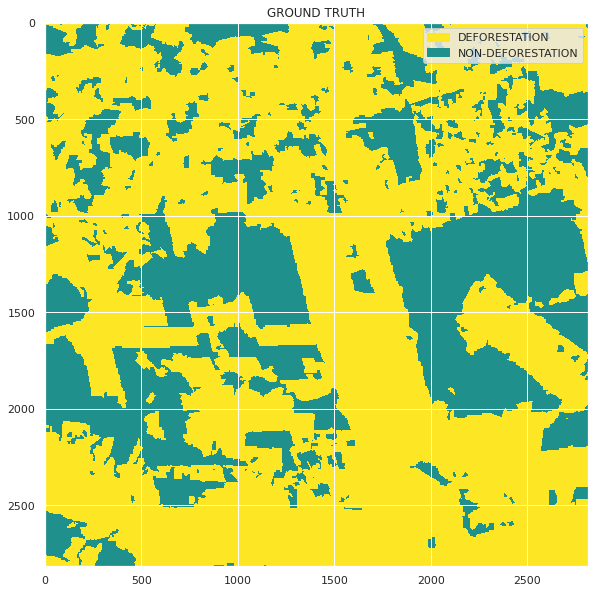

In [65]:
# PLOT REFERENCE MAP
norm_ccolors = np.array(ccolors)/255.0
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
cmap = colors.ListedColormap(norm_ccolors)
bounds = [0, 1, 2]
norm = colors.BoundaryNorm(bounds, cmap.N)
labels = y_test_4[:, :, 0].copy()
labels[labels!=2] = 0
labels[labels==2] = 1
ax.imshow(labels, cmap = cmap, norm=norm, interpolation = "nearest", origin = "upper")
ax.set_title("GROUND TRUTH")
rectangles = [matplotlib.patches.Rectangle((0, 0), 1, 1, color=norm_ccolors[r]) for r in range(norm_ccolors.shape[0])]
classes = ["DEFORESTATION", "NON-DEFORESTATION"]
#Create legend from custom artist/label lists
ax.legend(rectangles, classes)
plt.show()
labels = labels.astype("uint8")

ACCURACY METRICS OF SEGNET RESULTS:

Overall Accuracy: 0.873110
F1 SCORE: 0.748574
PA of Deforestation: 0.940810
PA of Non-Deforestation: 0.730824
User Accuracy of Deforestation: 0.940810
User Accuracy of Non-Deforestation: 0.730824
Producer Accuracy of Deforestation: 0.880178
Producer Accuracy of Non-Deforestation: 0.854542


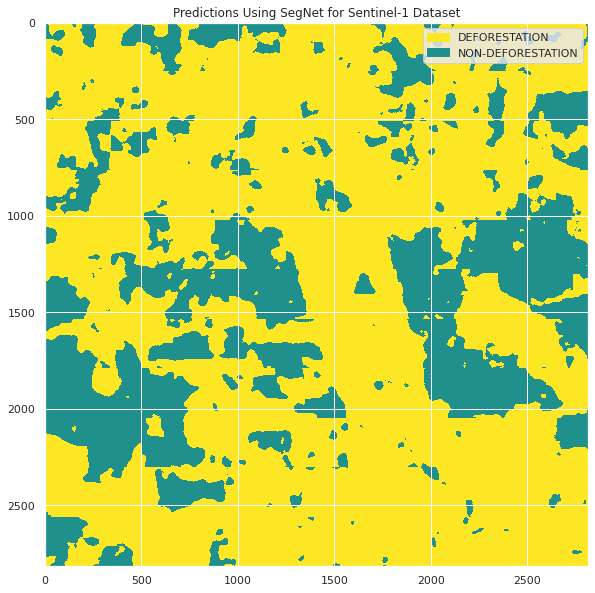

In [66]:
# EVALUATE SEGNET BASED LATE FUSION
predictions = predictions_FCN
mapidx = cartesian([range(predictions.shape[0]), range(predictions.shape[1])])
CM = get_confusion_matrix(predictions, labels)
OA = np.sum(np.diag(CM))/predictions.size
PA_bldg = ((predictions[labels==0]==labels[labels==0]).sum())/(labels[labels==0].size)
PA_rd = ((predictions[labels==1]==labels[labels==1]).sum())/(labels[labels==1].size)

# CALCULATION OF USER ACCURACY FOR DEFORESTATION
a = CM[0][0]
b = CM[0][1]
ua_deforestation = a/(a+b)
c = CM[1][0]
d = CM[1][1]
ua_non_deforest = d/(c+d)

# CALCULATION OF PRODUCER ACCURACY FOR DEFORESTATION
e = CM[0][0]
f = CM[1][0]
pa_deforestation = e/(e+f)
g = CM[0][1]
h = CM[1][1]
pa_non_deforest = h/(g+h)

print("ACCURACY METRICS OF SEGNET RESULTS:\n")
print("Overall Accuracy: %f" % OA)
print("F1 SCORE: %f" %(f1_score(labels, predictions, average="macro")))
print("PA of Deforestation: %f" % PA_bldg)
print("PA of Non-Deforestation: %f" % PA_rd)

print("User Accuracy of Deforestation: %f" % ua_deforestation)
print("User Accuracy of Non-Deforestation: %f" % ua_non_deforest)
print("Producer Accuracy of Deforestation: %f" % pa_deforestation)
print("Producer Accuracy of Non-Deforestation: %f" % pa_non_deforest)

mapfname = "/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/OUTPUT_TIFF/CLOUDY/2020/SENTINEL1_TEST_2.tif"

predictions_ = predictions.flatten()
print_map_2(predictions_, mapidx, ccolors = ccolors, filename = mapfname)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(predictions, cmap = cmap, norm = norm, interpolation = "nearest", origin = "upper")
ax.set_title("Predictions Using SegNet for Sentinel-1 Dataset")

# Code for Printing the Labels
rectangles = [matplotlib.patches.Rectangle((0, 0), 1, 1, color = norm_ccolors[r]) for r in range(norm_ccolors.shape[0])]
classes = ["DEFORESTATION", "NON-DEFORESTATION"]
ax.legend(rectangles, classes)

plt.show()

In [67]:
# PUTTING ALL THE TRUE AND FALSE VALUES INSIDE A "CSV" FILE
import pandas as pd
predictions_2 = predictions.ravel()
labels_2 = labels.ravel()
sentinel2_full = (predictions_2 == labels_2)
sentinel2_full_2 = pd.Series(sentinel2_full)
sentinel2_full_3 = pd.DataFrame(sentinel2_full_2)
sentinel2_full_4 = sentinel2_full_3.rename(columns = {0:'SENTINEL1'})
sentinel2_full_4

,SENTINEL1
0,False
1,False
2,False
3,False
4,False
...,...
7929851,True
7929852,True
7929853,True
7929854,True


In [68]:
sentinel2_full_4.to_csv("/content/drive/MyDrive/MASTER_RESEARCH/MODEL_TESTING/2_DEFORESTATION/AKHIL_MODEL/MCNEMAR_TEST/CLOUDY/SENTINEL1/TEST2.csv")

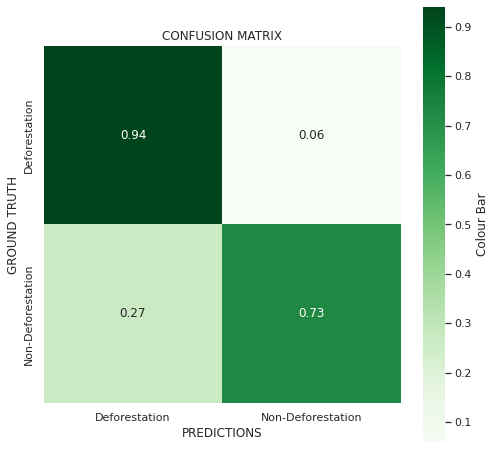

In [69]:
# print("NORMALIZED CONFUSION MATRIX:")
cm_normalized = np.round(CM/np.sum(CM, axis = 1).reshape(-1, 1), 2)
# print(cm_normalized)
sns.heatmap(cm_normalized, cmap = "Greens", annot = True, 
            cbar_kws = {"orientation":"vertical", "label":"Colour Bar"},
            xticklabels = ["Deforestation", "Non-Deforestation"], yticklabels = ["Deforestation", "Non-Deforestation"], square = True)
sns.set(rc = {'figure.figsize':(8, 8)})
plt.xlabel("PREDICTIONS")
plt.ylabel("GROUND TRUTH")
plt.title("CONFUSION MATRIX")
plt.show()